In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set the style
plt.style.use('fivethirtyeight')

df = pd.read_csv('/content/diabetes.csv') # Read the dataset.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [7]:
df.isna().mean() * 100

,0
Pregnancies,0.0
Glucose,0.0
BloodPressure,0.0
SkinThickness,0.0
Insulin,0.0
BMI,0.0
DiabetesPedigreeFunction,0.0
Age,0.0
Outcome,0.0


In [8]:
X = df.drop(columns=['Outcome'])
y = df[['Outcome']]

In [9]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
280,0,146,70,0,0,37.9,0.334,28
519,6,129,90,7,326,19.6,0.582,60
542,10,90,85,32,0,34.9,0.825,56
299,8,112,72,0,0,23.6,0.840,58
343,5,122,86,0,0,34.7,0.290,33


In [13]:
y_train.head()

,Outcome
280,1
519,0
542,1
299,0
343,0


In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614, 1), (154, 1))

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train

array([[0.        , 0.73366834, 0.61403509, ..., 0.56482861, 0.10930828,
        0.11666667],
       [0.35294118, 0.64824121, 0.78947368, ..., 0.29210134, 0.21520068,
        0.65      ],
       [0.58823529, 0.45226131, 0.74561404, ..., 0.52011923, 0.31895816,
        0.58333333],
       ...,
       [0.29411765, 0.62311558, 0.64912281, ..., 0.50670641, 0.06063194,
        0.28333333],
       [0.23529412, 0.91959799, 0.        , ..., 0.42324888, 0.05721605,
        0.25      ],
       [0.        , 0.7638191 , 0.71929825, ..., 0.61847988, 0.08198121,
        0.1       ]])

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614, 1), (154, 1))

In [18]:
label = y_test['Outcome'].unique()
label

array([1, 0])

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
from sklearn.metrics import accuracy_score

# Make predictions
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.8061889250814332
Test Accuracy: 0.7402597402597403


In [21]:
accuracy_score_list = []

for i in range(1,20,2):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    accuracy_score_list.append([i,train_accuracy,test_accuracy])

df = pd.DataFrame(accuracy_score_list,columns=['n_neighbors','train_accuracy','test_accuracy'])
df

,n_neighbors,train_accuracy,test_accuracy
0,1,1.000000,0.714286
1,3,0.843648,0.727273
2,5,0.806189,0.740260
3,7,0.801303,0.740260
4,9,0.791531,0.707792
5,11,0.783388,0.714286
6,13,0.788274,0.707792
7,15,0.786645,0.746753
8,17,0.771987,0.740260
9,19,0.780130,0.727273


In [22]:
df = df.sort_values(by='test_accuracy',ascending=False)
df

,n_neighbors,train_accuracy,test_accuracy
7,15,0.786645,0.746753
2,5,0.806189,0.740260
3,7,0.801303,0.740260
8,17,0.771987,0.740260
1,3,0.843648,0.727273
9,19,0.780130,0.727273
0,1,1.000000,0.714286
5,11,0.783388,0.714286
4,9,0.791531,0.707792
6,13,0.788274,0.707792


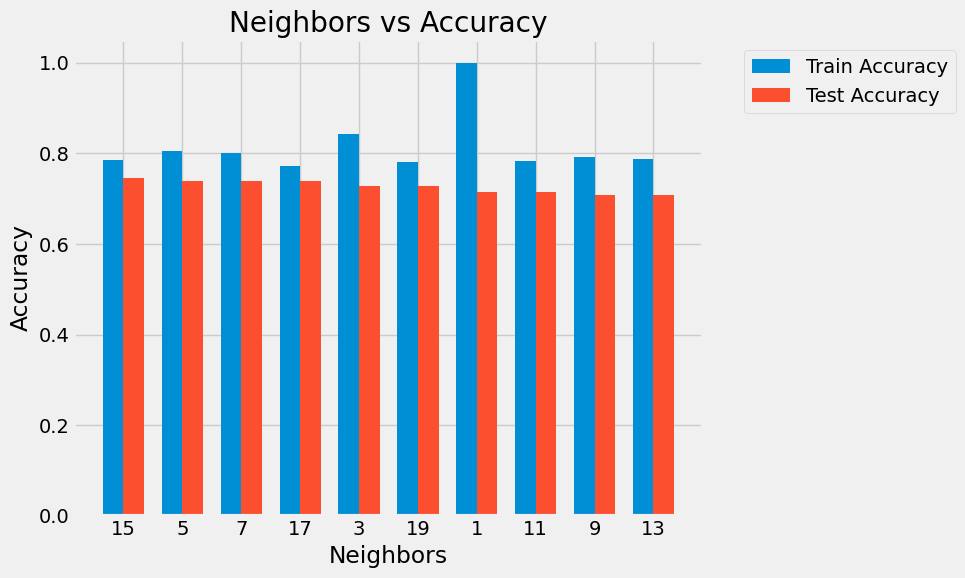

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

X_axis = np.arange(len(df['n_neighbors']))
width = 0.35

plt.bar(X_axis - width/2, df['train_accuracy'], width, label='Train Accuracy')
plt.bar(X_axis + width/2, df['test_accuracy'], width, label='Test Accuracy')

plt.xticks(X_axis, df['n_neighbors'])  # Set x-axis labels to 'n_neighbors' values
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.title('Neighbors vs Accuracy')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside the plot
plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=17)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Make predictions
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.7719869706840391
Test Accuracy: 0.7402597402597403


In [26]:
import joblib
joblib.dump(classifier, 'knn_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [27]:
import joblib
classifier = joblib.load('/content/knn_model.joblib')
scaler = joblib.load('/content/scaler.joblib')

In [28]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [29]:
d = {'Pregnancies': 3,
 'Glucose': 148,
 'BloodPressure': 72,
 'SkinThickness': 35,
 'Insulin': 0,
 'BMI': 33.6,
 'DiabetesPedigreeFunction': 0.627,
 'Age':50}

d

{'Pregnancies': 3,
 'Glucose': 148,
 'BloodPressure': 72,
 'SkinThickness': 35,
 'Insulin': 0,
 'BMI': 33.6,
 'DiabetesPedigreeFunction': 0.627,
 'Age': 50}

In [30]:
sample_data = pd.DataFrame([d])
sample_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,148,72,35,0,33.6,0.627,50


In [31]:
scaled_data = scaler.transform(sample_data)
scaled_data

array([[0.17647059, 0.74371859, 0.63157895, 0.35353535, 0.        ,
        0.50074516, 0.23441503, 0.48333333]])

In [32]:
classifier.predict(scaled_data)[0]

1

In [33]:
classifier.predict_proba(scaled_data)[0]

array([0.47058824, 0.52941176])

In [34]:
def predict_diabetes(d):
    sample_data = pd.DataFrame([d])
    scaled_data = scaler.transform(sample_data)
    pred = classifier.predict(scaled_data)[0]
    prob = np.max(classifier.predict_proba(scaled_data)[0])
    return pred,prob

In [35]:
d = {'Pregnancies': 3,
 'Glucose': 148,
 'BloodPressure': 72,
 'SkinThickness': 35,
 'Insulin': 0,
 'BMI': 33.6,
 'DiabetesPedigreeFunction': 0.627,
 'Age':50}


pred,prob = predict_diabetes(d)
pred,prob

(1, 0.5294117647058824)

In [36]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [37]:
X['Age'].min()

21

In [38]:
X['Age'].max()

81

In [43]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load the pre-trained classifier and scaler using joblib
classifier = joblib.load('knn_model.joblib')
scaler = joblib.load('scaler.joblib')

# Define the prediction function
def predict_diabetes(d):
    sample_data = pd.DataFrame([d])
    scaled_data = scaler.transform(sample_data)
    pred = classifier.predict(scaled_data)[0]
    prob = np.max(classifier.predict_proba(scaled_data)[0])
    return pred,prob

# Streamlit UI components
st.title("Diabetes Prediction")

# Input fields for each parameter
Pregnancies = st.number_input("Pregnancies", min_value=0, max_value=17, value=0, step=1)
Glucose = st.number_input("Glucose", min_value=0, max_value=199, value=0, step=1)
BloodPressure = st.number_input("BloodPressure", min_value=0, max_value=122, value=0, step=1)
SkinThickness = st.number_input("SkinThickness", min_value=0, max_value=99, value=0, step=1)
Insulin = st.number_input("Insulin", min_value=0, max_value=846, value=0, step=1)
BMI = st.number_input("BMI", min_value=0.0, max_value=67.1, value=0.0, step=0.1)
DiabetesPedigreeFunction = st.number_input("DiabetesPedigreeFunction", min_value=0.078, max_value=2.42, value=0.1, step=0.1)
Age = st.number_input("Age", min_value=10, max_value=100, value=20, step=1)

# Create the input dictionary for prediction
input_data = {
    'Pregnancies': Pregnancies,
    'Glucose': Glucose,
    'BloodPressure': BloodPressure,
    'SkinThickness': SkinThickness,
    'Insulin': Insulin,
    'BMI': BMI,
    'DiabetesPedigreeFunction': DiabetesPedigreeFunction,
    'Age': Age
}

# When the user clicks the "Predict" button
if st.button("Predict"):
    with st.spinner('Making prediction...'):
        pred, prob = predict_diabetes(input_data)

        if pred == 1:
            st.error(f"Prediction: Diabetes with probability {prob:.2f}")
        else:
            st.success(f"Prediction: No Diabetes with probability {prob:.2f}")

Overwriting app.py


In [40]:
%%writefile requirements.txt
streamlit
pandas==2.2.2
joblib==1.4.2
scikit-learn==1.6.1

Writing requirements.txt
